In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Grid

In [3]:
n, m = 20,20  # number of rows and columns respectively.

obstacles = [[2.725, -0.00000027, 4, 1, -40],
             [7.425, 4.725, 4, 1, 0],
             [-1.025, -1.5, 4, 1, 0],
             [-6.7, 6.4, 4, 1, 0],
             [-5.15, -6.2, 4, 1, 150],
             [2.425, 4.075, 1, 1, 0],
             [4.4, 0.875, 1, 1, 0],
             [2.825, -4.85, 1, 1, 0],
             [-0.525, 6.3, 1, 1, 0],
             [-5.125, 3.425, 1, 1, 0],
             [-1.775, 2.1, 1, 1, 0],
             [-5.8, -0.975, 1, 1, 0],
             [7.275, -7.75, 1, 1, 0]
              ]

In [4]:
# Create a matrix to represent the cells of the grid
grid = np.zeros((n, m))

for obs in obstacles:
    if not obs[4]:
        for i in range(math.floor(obs[0] - obs[2]/2)+10, math.ceil(obs[0] + obs[2]/2)+10, 1):
            for j in range(math.floor(obs[1] - obs[3]/2)+10, math.ceil(obs[1] + obs[3]/2)+10, 1):
                grid[j][i] = 1
    else:
        diag = sqrt(square(obs[2]) + square(obs[3]))
        for i in range(math.floor(obs[0] - diag/2)+10, math.ceil(obs[0] + diag/2)+10, 1):
            for j in range(math.floor(obs[1] - diag/2)+10, math.ceil(obs[1] + diag/2)+10, 1):
                grid[j][i] = 1
                
grid[1][2] = 0
#         l1 = absolute(cos(pi*obs[4]/180) * obs[2])
#         h1 = absolute(sin(pi*obs[4]/180) * obs[2])
#         for i in range(math.ceil(l1)):
#             for j in range(math.ceil(h1-i/2)):
#                 print(l1,h1)
#                 grid[math.floor(obs[1] - diag/2)+10+j][math.floor(obs[0] - diag/2)+10+i] = 0
#                 grid[math.ceil(obs[1] + diag/2)+10-j][math.ceil(obs[0] + diag/2)+10-i] = 0

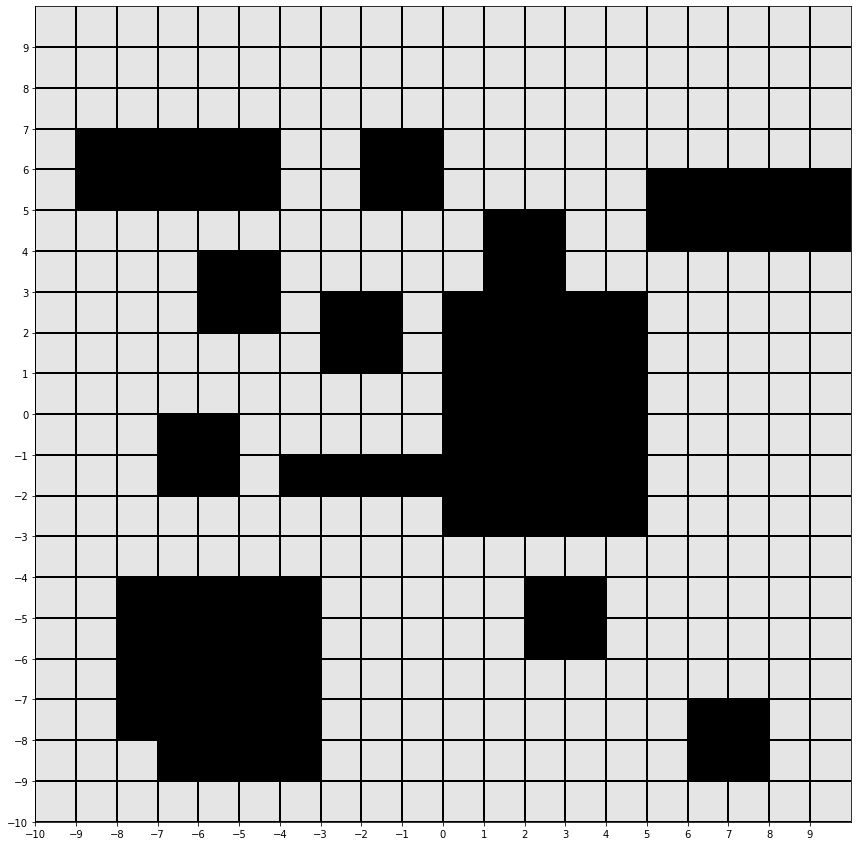

In [5]:
from matplotlib import colors
# Plot the grid
def draw_grid():
    fig, ax = plt.subplots(figsize=(15,15))
    cmap = colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid, cmap=cmap, origin='lower', extent=[-10,10,-10,10])
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-m/2, m/2, 1));
    ax.set_yticks(np.arange(-n/2, n/2, 1));

draw_grid()

In [6]:
import networkx as nx
# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(n, m) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        # if the node is an obstacle
        if grid[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))
print("Nodes:", G.nodes())

Number of nodes in a full grid (n*m):  400
Number of nodes after removing obstacles:  294
Nodes: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 1), (1, 2), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 18), (1, 19), (2, 0), (2, 1), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 18), (2, 19), (3, 0), (3, 1), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 0), (4, 1), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 0), (5, 1), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6,

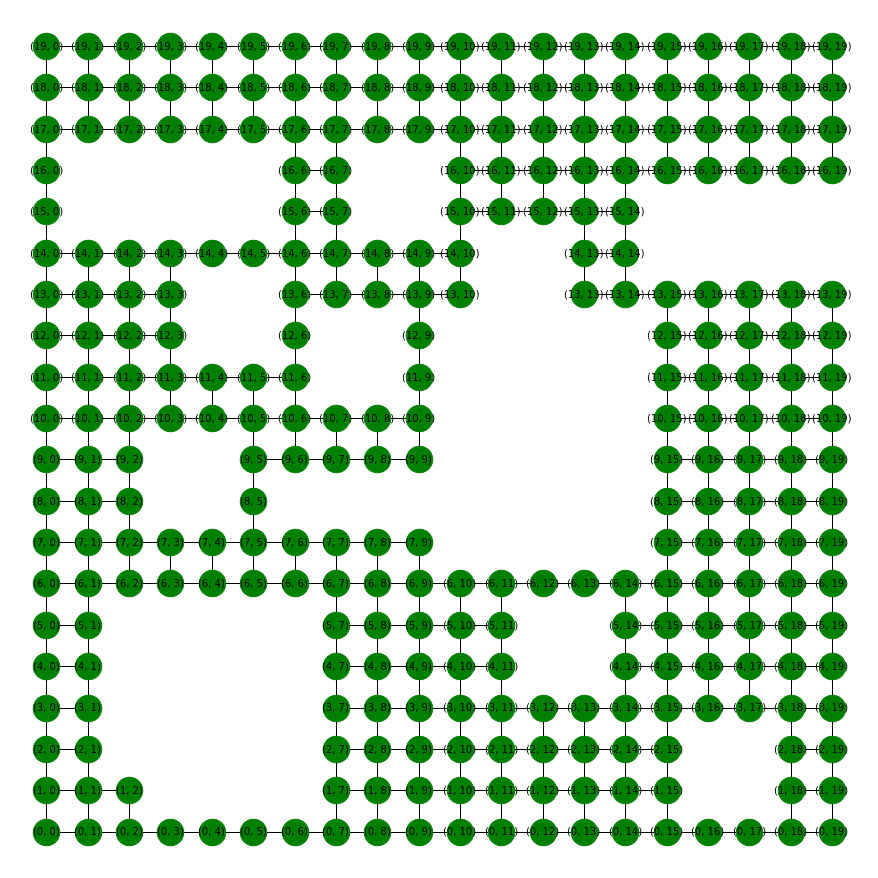

In [7]:
# Position of the nodes
figure(1,figsize=(12,12))
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = (j, i), where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=700, node_color="g")

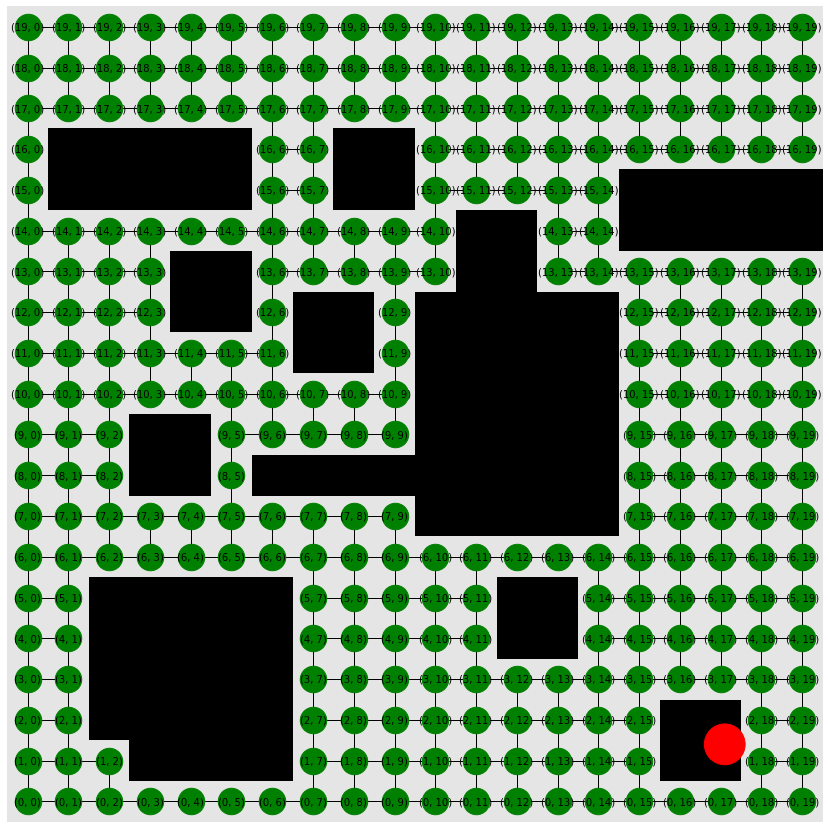

In [11]:
# Plot grid
def overlap_grid():
    fig, ax = plt.subplots(figsize=(15,15))
    cmap = colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, m, 1));
    ax.set_yticks(np.arange(-0.5, n, 1));
    ax.add_patch(Circle((17.1, 1.4), 0.5, color='r'))
overlap_grid()

# Plot the graph
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = j, -i, where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=700, node_color="g")